In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
url = r"TSLA.csv"
df = pd.read_csv(url)

# Convert to datetime format, in the Year, month, day format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

print('Shape of data \t', df.shape)
df.head()

Shape of data 	 (2845, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
# Define the start date in the df as a global variable
start_date = pd.to_datetime('2010-06-29')

<Axes: xlabel='Date'>

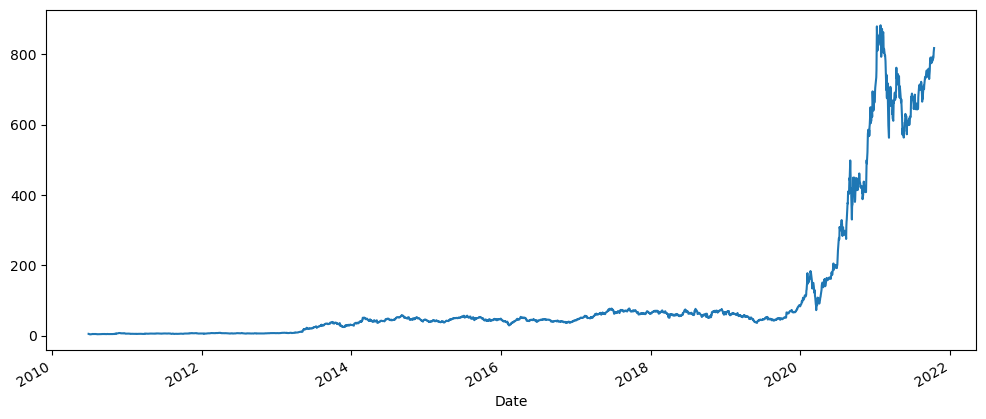

In [4]:
#Showing the stock prices
df = pd.read_csv(url, index_col="Date", parse_dates=True)

df['Close'].plot(figsize=(12,5))

In [5]:
# Train the model using linear regression

In [6]:
# Splitting the dataset, getting the correct values

X = df[['Open','High','Low','Volume']].values # inndependent values
y = df['Close'].values # The variable the dataframe want to predict on

# Splitting the data 80% traing and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Checking the shape for train data, how much is used for testing/training
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (2276, 4)
Test: (569, 4)


In [8]:
# Training the model for Linear Prediciction

# Creating Regression Model
regressor = LinearRegression()

# Fit linear regression model
model = regressor.fit(X_train, y_train)

# Use model top make predictopnp, predicted values is now in y_pred
y_pred = regressor.predict(X_test) 

In [9]:
# Prediction Table of Actual Prices vs Predicted values

# Uses model regressor (linearRegression()) to make predictions on data "X_test", puts them in "predicted"
predicted = regressor.predict(X_test)

dframe = pd.DataFrame(predicted, index=y_test)

# Making a dataframe showing the actual (y_test), and predicted price (predicted), to easily compare
dfr = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price':predicted})

# Printing out first 10
print(dfr.head(10))


   Actual_Price  Predicted_Price
0     38.436001        38.610541
1    673.580017       664.424655
2      5.582000         5.628072
3      7.094000         7.098933
4    156.376007       160.346724
5     48.243999        47.964242
6     45.001999        45.239484
7     48.556000        48.913865
8     46.464001        46.800102
9      4.592000         4.611518


In [10]:
# Predict stock price on specific date 
# Input = specific date 
# Output = Stock market close price

In [11]:
# tester
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

def predict_stock_price(input_date):
    input_date = pd.to_datetime(input_date)
    # Calculate the number of days since the start date
    days_since_start = (input_date - start_date).days
    # Prepare the input features for prediction
    input_features = np.array([[df.loc[input_date, 'Open'], df.loc[input_date, 'High'], df.loc[input_date, 'Low'], df.loc[input_date, 'Volume']]])
    
    # Predict the stock price using the model
    predicted_price = regressor.predict(input_features)[0]
    return predicted_price

In [12]:
# Testing on a date

specific_date = '2014-10-06'
predicted_price = predict_stock_price(specific_date)
print(f"Predicted stock price on {specific_date}: ${predicted_price:.2f}")

Predicted stock price on 2014-10-06: $51.98


In [13]:
# Compare actual vs predicted close

print(f"Predicted stock price on {specific_date}: ${predicted_price:.2f}")
actual_price = df.loc[specific_date, 'Close']
print(f"Actual stock price on {specific_date}: ${actual_price:.2f}")

Predicted stock price on 2014-10-06: $51.98
Actual stock price on 2014-10-06: $52.12


In [14]:
# Model accuracy

x2 = abs(predicted - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.95 %.


In [15]:
# Different visualizations of the actual vs predicted closing

In [16]:
dfr.describe()

,Actual_Price,Predicted_Price
count,569.000000,569.000000
mean,111.827958,111.809293
std,197.018998,197.098241
min,3.628000,3.670815
25%,7.408000,7.512185
50%,45.764000,45.591468
75%,65.444000,64.689126
max,872.789978,874.135442


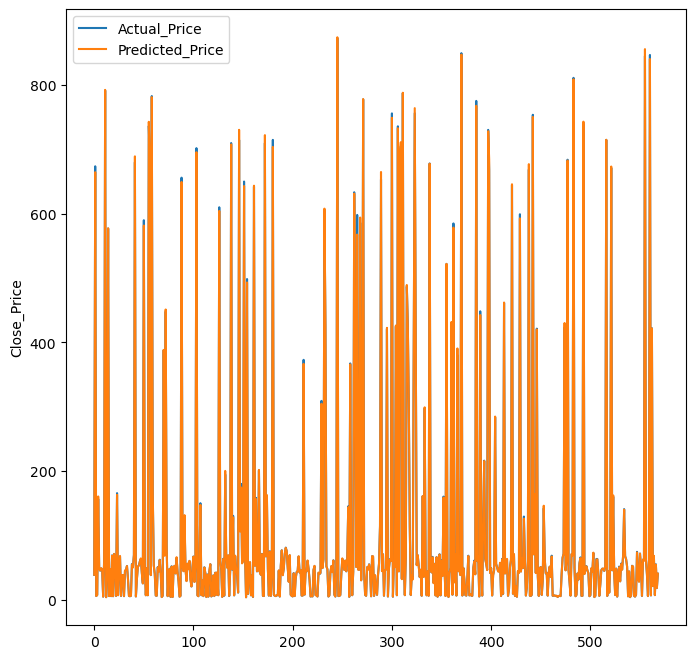

In [17]:
plt.figure(figsize=(8,8))
plt.ylabel('Close_Price', fontsize=10)
plt.plot(dfr)

plt.legend(['Actual_Price','Predicted_Price'])
plt.show()

<Axes: >

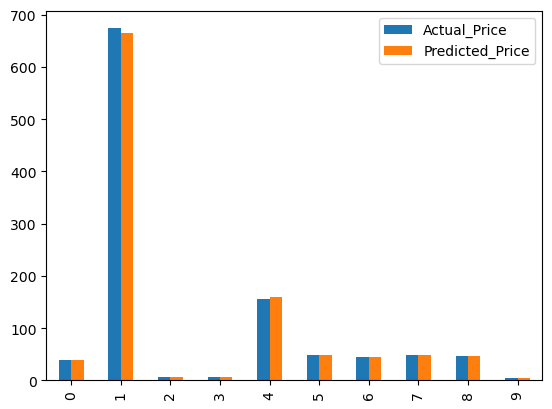

In [18]:
# graph first 10 values
graph = dfr.head(10)
graph.plot(kind='bar')

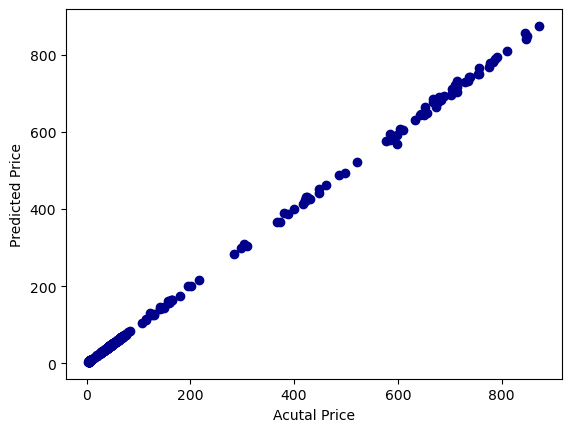

In [19]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color='DarkBlue')
plt.xlabel("Acutal Price")
plt.ylabel("Predicted Price")
plt.show()